In [1]:
import numpy as np
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from scipy.io import arff
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [2]:
data, meta = arff.loadarff('dataSet.arff')
df = pd.DataFrame(data)
df = df.astype(int)
X = df.drop('Result', axis=1)
Y = df['Result']

label_encoder = LabelEncoder()
Y_integer = label_encoder.fit_transform(Y)

# Y_binary = (Y + 1) // 2
# print(Y_binary[0:5])
# print(Y.head())


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_integer, test_size = 0.2, random_state = 2023)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
lr=LogisticRegression(max_iter=5000, C=0.1)
svm = SVC(kernel="rbf", probability=True)
rf = RandomForestClassifier(max_depth=20, n_estimators=200)
xgb = XGBClassifier(learning_rate=0.2, n_estimators=200)

voting_clf = VotingClassifier(estimators=[('lr', lr), ('svm', svm), ('rf', rf), ('xgb', xgb)], voting="soft", verbose=1)

voting_clf.fit(X_train, Y_train)

[Voting] ....................... (1 of 4) Processing lr, total=   0.0s
[Voting] ...................... (2 of 4) Processing svm, total=   5.6s
[Voting] ....................... (3 of 4) Processing rf, total=   0.9s
[Voting] ...................... (4 of 4) Processing xgb, total=   0.2s


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, max_iter=5000)),
                             ('svm', SVC(probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categ...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 verbose=1, voting='soft')

In [4]:
print("Accuracy on test: " + str(voting_clf.score(X_test, Y_test)))
print("Accuracy on train: "+ str(voting_clf.score(X_train, Y_train)))

Accuracy on test: 0.9629127091813658
Accuracy on train: 0.9777250113071009


In [5]:
param_grid = {
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'xgb__max_depth': [5, 10, 15, 20],
    'rf__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose = 1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[Voting] ....................... (1 of 4) Processing lr, total=   0.0s
[Voting] ...................... (2 of 4) Processing svm, total=   4.9s
[Voting] ....................... (3 of 4) Processing rf, total=   0.9s
[Voting] ...................... (4 of 4) Processing xgb, total=   0.3s


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=0.1,
                                                                        max_iter=5000)),
                                                    ('svm',
                                                     SVC(probability=True)),
                                                    ('rf',
                                                     RandomForestClassifier(max_depth=20,
                                                                            n_estimators=200)),
                                                    ('xgb',
                                                     XGBClassifier(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopp...
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=200,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...))],
                                        verbose=1, voting='soft'),
             n_jobs=-1,
             param_grid={'lr__C': [0.1, 1, 10],
                         'rf__min_samples_split': [2, 5, 10],
                         'svm__C': [0.1, 1, 10],
                         'xgb__max_depth': [5, 10, 15, 20]},
             scoring='accuracy', verbose=1)

In [6]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print('Best parameters: ', best_params)
print('Best model', best_model)

Best parameters:  {'lr__C': 1, 'rf__min_samples_split': 2, 'svm__C': 10, 'xgb__max_depth': 20}
Best model VotingClassifier(estimators=[('lr', LogisticRegression(C=1, max_iter=5000)),
                             ('svm', SVC(C=10, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=200)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_ca...
                                            importance_typ

In [7]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9678878335594754


In [8]:
import joblib
joblib.dump(best_model, 'vclf.pkl')

['vclf.pkl']

In [9]:
import MetricFunctions
MetricFunctions.printAccuracy(best_model, X_train, X_test, Y_train, Y_test)
MetricFunctions.printLoss(best_model, X_train, X_test, Y_train, Y_test)

Test accuracy: 96.79%
Train accuracy: 98.71%
Test Log Loss: 0.09355664970525618
Train Log Loss: 0.05754461110093368


In [10]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
y_score = y_prob[:, 1]

In [11]:
MetricFunctions.printAUCandPvalues(Y_test, y_score)

AUC-ROC: 0.9956139255262457
P-value: 0.008772148947508551


In [12]:
MetricFunctions.printAUCPRandF1Scores(Y_test, y_pred, y_score)

AUC-PR: 0.9966541766670766
F1 Score: 0.9717469160366097


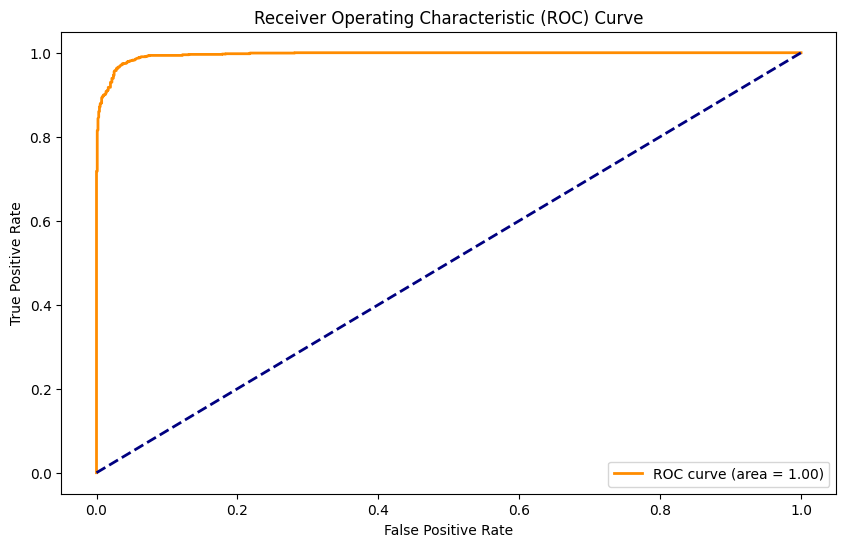

In [13]:
MetricFunctions.plotROCCurve(Y_test, y_score)

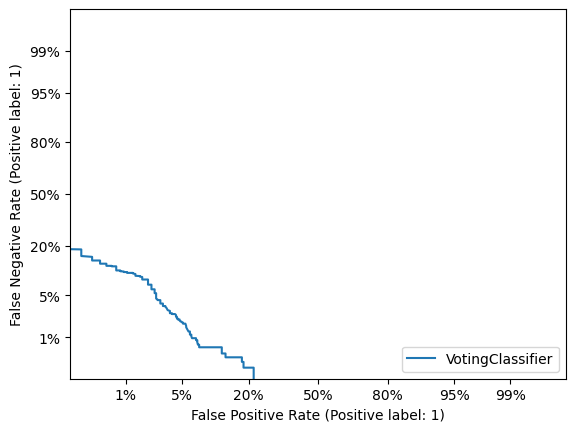

In [14]:
MetricFunctions.plotDetCurve(best_model, X_test, Y_test)

Confusion Matrix:
[[ 919   41]
 [  30 1221]]


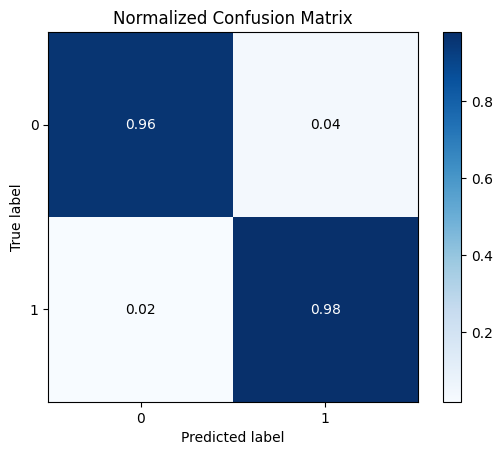

In [15]:
MetricFunctions.printConfMatrix(Y_test, y_pred)
MetricFunctions.plotConfMatrix(Y_test, y_pred)

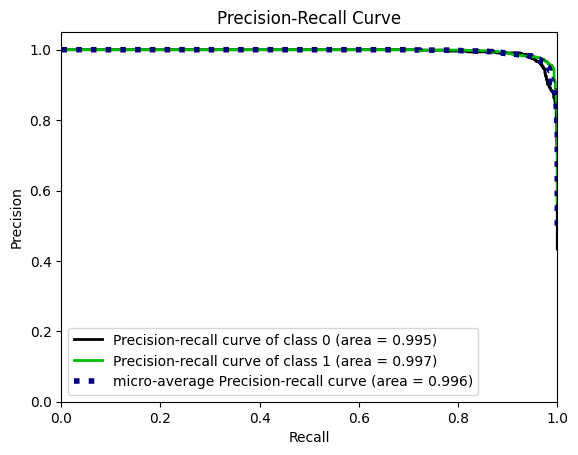

In [16]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_precision_recall(Y_test, y_prob)
plt.show()

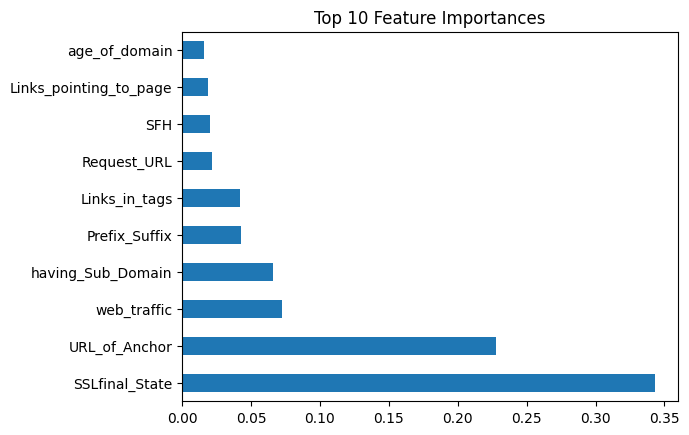

In [17]:
rf_classifier = voting_clf.named_estimators_['rf']
MetricFunctions.plotFeatureImportance(rf_classifier, X)